
1.  What is a Support Vector Machine (SVM)?

-> SVM is a supervised learning algorithm used for classification and regression. It finds the optimal hyperplane that best separates data points of different classes with the maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM?
-> Hard Margin SVM assumes data is linearly separable with no misclassifications. Soft Margin SVM allows some misclassifications using a penalty (via the C parameter) to handle noise or non-linearly separable data.

3. What is the mathematical intuition behind SVM?
-> SVM aims to maximize the margin between support vectors of different classes by solving a constrained optimization problem, ensuring the best separation. This results in better generalization on unseen data.

4. What is the role of Lagrange Multipliers in SVM?
-> Lagrange Multipliers transform the constrained optimization problem into its dual form. This enables efficient computation and the application of the kernel trick for non-linear classification.

5. What are Support Vectors in SVM?
-> Support vectors are the data points closest to the separating hyperplane. They are critical as they define the position and orientation of the hyperplane.

6. What is a Support Vector Classifier (SVC)?
-> SVC is the classification implementation of SVM that finds a decision boundary to separate data into distinct classes. It supports both linear and non-linear classification using kernels.

7. What is a Support Vector Regressor (SVR)?
-> SVR adapts SVM for regression by fitting the best line within a specified error margin (epsilon). It focuses on predicting continuous values while ignoring small deviations.

8. What is the Kernel Trick in SVM?
-> The kernel trick transforms data into a higher-dimensional space without explicitly computing the transformation. This enables SVM to handle non-linear relationships using linear methods in the new space.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

* **Linear Kernel**: Best for linearly separable data; fast and simple.
* **Polynomial Kernel**: Captures polynomial relationships; more complex.
* **RBF (Radial Basis Function) Kernel**: Most versatile; captures local patterns and non-linear relationships effectively.

10. What is the effect of the C parameter in SVM?
-> C controls the trade-off between maximizing the margin and minimizing classification error. A high C penalizes misclassification heavily (low bias, high variance), while a low C allows more flexibility (high bias, low variance).

11. What is the role of the Gamma parameter in RBF Kernel SVM?
-> Gamma defines how far the influence of a single training example reaches. A high gamma focuses on nearby points (overfitting), while a low gamma has a broader influence (underfitting).

---

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
-> Naïve Bayes is a probabilistic classifier based on Bayes' Theorem, assuming strong (naïve) independence between features. It’s called "naïve" because it assumes that all features contribute independently to the outcome.

13. What is Bayes’ Theorem?
-> Bayes’ Theorem calculates the probability of a hypothesis given prior knowledge. It is expressed as:
**P(H|E) = (P(E|H) \* P(H)) / P(E)**

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?

* **Gaussian NB**: Assumes features follow a normal distribution; used for continuous data.
* **Multinomial NB**: Used for discrete counts (e.g., word frequencies in text).
* **Bernoulli NB**: Works with binary features (e.g., presence/absence of a word).

15. When should you use Gaussian Naïve Bayes over other variants?
-> Use Gaussian Naïve Bayes when the input features are continuous and approximately follow a normal distribution. It’s ideal for datasets like iris or sensor measurements.

16. What are the key assumptions made by Naïve Bayes?
-> It assumes all features are conditionally independent given the class label and that the likelihood of features follows a specific distribution (e.g., Gaussian). This simplifies computation but is rarely true in practice.

17. What are the advantages and disadvantages of Naïve Bayes?
-> Advantages include simplicity, fast training, and good performance on high-dimensional data. Disadvantages include poor performance if the independence assumption is violated or if feature distributions are misestimated.

18. Why is Naïve Bayes a good choice for text classification?
-> Naïve Bayes performs well on text data due to the high dimensionality and sparsity of word features, and the relative independence between word occurrences in documents.

19. Compare SVM and Naïve Bayes for classification tasks?
-> SVM generally gives better accuracy, especially on complex datasets with non-linear boundaries, but is slower. Naïve Bayes is faster and works well on text but can struggle with dependent features.

20. How does Laplace Smoothing help in Naïve Bayes?
-> Laplace Smoothing adds a small constant (usually 1) to all feature counts to prevent zero probabilities for unseen features during prediction. This improves robustness, especially with sparse data.




In [ ]:
#  Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


In [ ]:
# Train two SVM classifiers (Linear & RBF) on the Wine dataset and compare accuracies
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')

linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

linear_acc = accuracy_score(y_test, linear_svm.predict(X_test))
rbf_acc = accuracy_score(y_test, rbf_svm.predict(X_test))

print(f"Linear Kernel Accuracy: {linear_acc:.2f}")
print(f"RBF Kernel Accuracy: {rbf_acc:.2f}")

Linear Kernel Accuracy: 0.98
RBF Kernel Accuracy: 0.76


In [ ]:
# Train an SVM Regressor (SVR) on a housing dataset and evaluate using MSE
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3489971413208723


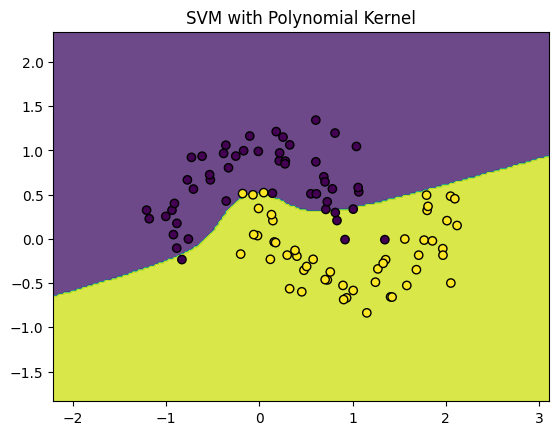

In [ ]:
# Train an SVM Classifier with Polynomial Kernel and visualize the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load data (only 2 features for 2D visualization)
X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=0)

clf = SVC(kernel='poly', degree=3, C=1.0)
clf.fit(X, y)

# Plotting decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM with Polynomial Kernel")
    plt.show()

plot_decision_boundary(clf, X, y)

In [ ]:
# Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9736842105263158


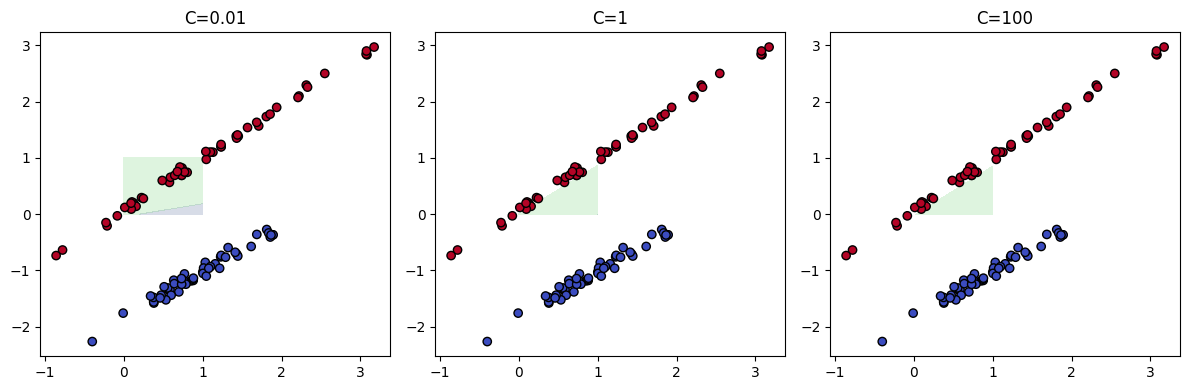

In [ ]:
# SVM Classifier with Different C Values – Visual Comparison
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                     n_clusters_per_class=1, n_samples=100, random_state=42)

C_values = [0.01, 1, 100]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)

    plt.subplot(1, 3, i + 1)
    plt.title(f"C={C}")
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                         np.linspace(ylim[0], ylim[1], 200))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

plt.tight_layout()
plt.show()

In [ ]:
#  Bernoulli Naïve Bayes for Binary Features
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, random_state=0)
X_bin = Binarizer(threshold=0.0).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, bnb.predict(X_test)))


Accuracy: 0.9066666666666666


In [ ]:
# SVM with and without Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# Without scaling
clf1 = SVC()
clf1.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, clf1.predict(X_test)))

# With scaling
clf2 = make_pipeline(StandardScaler(), SVC())
clf2.fit(X_train, y_train)
print("Accuracy with scaling:", accuracy_score(y_test, clf2.predict(X_test)))

Accuracy without scaling: 0.9233333333333333
Accuracy with scaling: 0.9233333333333333


In [ ]:
# Gaussian NB Before vs After Laplace Smoothing
from sklearn.naive_bayes import GaussianNB

# Without Laplace smoothing (default)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_default = gnb.predict(X_test)

# With Laplace smoothing (simulated by adding small value to variance)
gnb.var_ += 1e-9
pred_smooth = gnb.predict(X_test)

print("Accuracy before smoothing:", accuracy_score(y_test, pred_default))
print("Accuracy after smoothing:", accuracy_score(y_test, pred_smooth))


Accuracy before smoothing: 0.9166666666666666
Accuracy after smoothing: 0.9166666666666666


In [ ]:
# SVM + GridSearchCV for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9114285714285714


In [ ]:
# SVM on Imbalanced Data with Class Weights
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

# Without class weight
model1 = SVC()
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

# With class weight
model2 = SVC(class_weight='balanced')
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))

print("Accuracy without class weights:", acc1)
print("Accuracy with class weights:", acc2)


Accuracy without class weights: 0.9333333333333333
Accuracy with class weights: 0.9366666666666666


In [ ]:
# Naïve Bayes for Spam Detection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample email data
emails = ["Free money now!!!", "Hi friend, how are you?", "Win $$$ easily", "Let's meet for lunch", "Claim your reward"]
labels = [1, 0, 1, 0, 1]  # 1 = spam, 0 = ham

vec = CountVectorizer()
X = vec.fit_transform(emails)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.4, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Compare SVM and Naïve Bayes on Same Dataset
from sklearn.naive_bayes import GaussianNB

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

# Gaussian Naive Bayes
nb_model = GaussianNB()
# Convert sparse data to dense array for GaussianNB
nb_model.fit(X_train.toarray(), y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test.toarray()))

print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Naïve Bayes Accuracy: {nb_acc:.2f}")

SVM Accuracy: 0.50
Naïve Bayes Accuracy: 0.50


In [ ]:
# Feature Selection Before Naïve Bayes
from sklearn.feature_selection import SelectKBest, chi2

# Feature selection
X_new = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)
X_test_new = SelectKBest(chi2, k=10).fit(X_train, y_train).transform(X_test)

model = GaussianNB()
# model.fit(X_new, y_train)
model.fit(X_new.toarray(), y_train)
print("Accuracy after feature selection:", accuracy_score(y_test, model.predict(X_test_new.toarray())))

Accuracy after feature selection: 0.5


In [ ]:
# One-vs-Rest (OvR) and One-vs-One (OvO) with SVM on Wine Dataset
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovr_model = OneVsRestClassifier(SVC(kernel='linear'))
ovo_model = OneVsOneClassifier(SVC(kernel='linear'))

ovr_model.fit(X_train, y_train)
ovo_model.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr_model.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo_model.predict(X_test)))

OvR Accuracy: 0.9814814814814815
OvO Accuracy: 0.9814814814814815


In [ ]:
# SVM with Linear, Polynomial, and RBF Kernels on Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{k.capitalize()} Kernel Accuracy: {acc:.2f}")

Linear Kernel Accuracy: 0.96
Poly Kernel Accuracy: 0.94
Rbf Kernel Accuracy: 0.94


In [ ]:
# SVM with Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='linear')
scores = cross_val_score(model, X, y, cv=skf)

print("Cross-Validated Accuracies:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validated Accuracies: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Average Accuracy: 0.9473063188945815


In [ ]:
#  Naïve Bayes with Different Prior Probabilities
from sklearn.naive_bayes import GaussianNB

# Use manually defined priors
priors1 = [0.5, 0.5]
priors2 = [0.9, 0.1]

model1 = GaussianNB(priors=priors1)
model2 = GaussianNB(priors=priors2)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print("Accuracy with priors [0.5, 0.5]:", accuracy_score(y_test, model1.predict(X_test)))
print("Accuracy with priors [0.9, 0.1]:", accuracy_score(y_test, model2.predict(X_test)))

Accuracy with priors [0.5, 0.5]: 0.9415204678362573
Accuracy with priors [0.9, 0.1]: 0.935672514619883


In [ ]:
#  SVM with Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='linear')
scores = cross_val_score(model, X, y, cv=skf)

print("Cross-Validated Accuracies:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validated Accuracies: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Average Accuracy: 0.9473063188945815


In [ ]:
# Naïve Bayes with Different Prior Probabilities
from sklearn.naive_bayes import GaussianNB

# Use manually defined priors
priors1 = [0.5, 0.5]
priors2 = [0.9, 0.1]

model1 = GaussianNB(priors=priors1)
model2 = GaussianNB(priors=priors2)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print("Accuracy with priors [0.5, 0.5]:", accuracy_score(y_test, model1.predict(X_test)))
print("Accuracy with priors [0.9, 0.1]:", accuracy_score(y_test, model2.predict(X_test)))

Accuracy with priors [0.5, 0.5]: 0.9415204678362573
Accuracy with priors [0.9, 0.1]: 0.935672514619883


In [ ]:
# Recursive Feature Elimination (RFE) before SVM
from sklearn.feature_selection import RFE

base_model = SVC(kernel='linear')
rfe = RFE(base_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

print("Accuracy with RFE:", accuracy_score(y_test, rfe.predict(X_test)))

# Without RFE
base_model.fit(X_train, y_train)
print("Accuracy without RFE:", accuracy_score(y_test, base_model.predict(X_test)))

Accuracy with RFE: 0.9298245614035088
Accuracy without RFE: 0.9649122807017544


In [ ]:
# SVM with Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.907563025210084
Recall: 1.0
F1 Score: 0.9515418502202643


In [ ]:
# Naïve Bayes with Log Loss
from sklearn.metrics import log_loss

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
probs = nb_model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, probs))

Log Loss: 0.48986013210958873


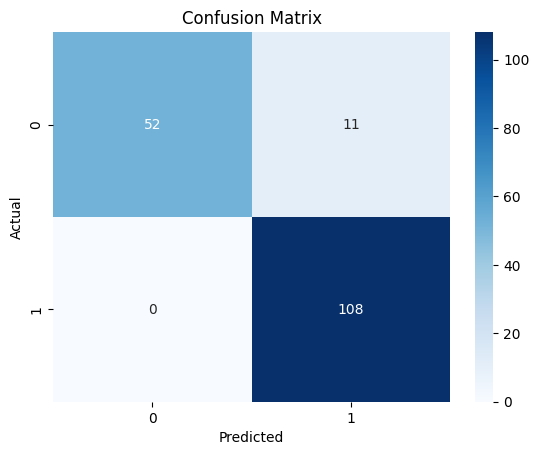

In [ ]:
# SVM Classifier – Confusion Matrix with Seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# SVR with Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.8648908409133058
